In [181]:
#ucitavamo osnovni, PCA i RFE trening skup

In [182]:
%store -r train_sets

In [183]:
%store -r test_sets

In [184]:
%store -r y_train

In [185]:
%store -r y_test

In [212]:
%store -r train_sets_KNN

In [213]:
%store -r test_sets_KNN

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
#desicion tree classifier

In [188]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
params = {
            'criterion' : ['gini', 'entropy'],
            'min_samples_split' : [2, 3, 4, 5, 6]
         }

In [190]:
model_GS_DST = GridSearchCV(
    DecisionTreeClassifier(),
    params,
    scoring = 'accuracy',
    cv = 5,
    verbose = 4)

In [191]:
import time

In [192]:
best_models_DST = {}
mean_train_time_DST = {}
for train_set in train_sets:
    print(train_set)
    
    start_time = time.time()
    model_GS_DST.fit(train_sets[train_set], y_train)
    end_time = time.time()
    
    best_models_DST[train_set] = model_GS_DST.best_estimator_
    mean_train_time_DST[train_set] = end_time - start_time
    print(mean_train_time_DST[train_set])

normal
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, min_samples_split=2;, score=0.981 total time=   2.0s
[CV 2/5] END criterion=gini, min_samples_split=2;, score=0.981 total time=   2.1s
[CV 3/5] END criterion=gini, min_samples_split=2;, score=0.984 total time=   2.1s
[CV 4/5] END criterion=gini, min_samples_split=2;, score=0.981 total time=   2.0s
[CV 5/5] END criterion=gini, min_samples_split=2;, score=0.982 total time=   2.1s
[CV 1/5] END criterion=gini, min_samples_split=3;, score=0.981 total time=   2.0s
[CV 2/5] END criterion=gini, min_samples_split=3;, score=0.981 total time=   2.2s
[CV 3/5] END criterion=gini, min_samples_split=3;, score=0.983 total time=   2.0s
[CV 4/5] END criterion=gini, min_samples_split=3;, score=0.982 total time=   2.0s
[CV 5/5] END criterion=gini, min_samples_split=3;, score=0.982 total time=   2.1s
[CV 1/5] END criterion=gini, min_samples_split=4;, score=0.982 total time=   2.0s
[CV 2/5] END criterion=gini, m

[CV 3/5] END criterion=entropy, min_samples_split=6;, score=0.982 total time=   1.7s
[CV 4/5] END criterion=entropy, min_samples_split=6;, score=0.981 total time=   2.2s
[CV 5/5] END criterion=entropy, min_samples_split=6;, score=0.978 total time=   2.2s
53.6069061756134
RFE
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, min_samples_split=2;, score=0.988 total time=   0.5s
[CV 2/5] END criterion=gini, min_samples_split=2;, score=0.986 total time=   0.6s
[CV 3/5] END criterion=gini, min_samples_split=2;, score=0.989 total time=   0.6s
[CV 4/5] END criterion=gini, min_samples_split=2;, score=0.984 total time=   0.5s
[CV 5/5] END criterion=gini, min_samples_split=2;, score=0.988 total time=   0.6s
[CV 1/5] END criterion=gini, min_samples_split=3;, score=0.988 total time=   0.6s
[CV 2/5] END criterion=gini, min_samples_split=3;, score=0.987 total time=   0.6s
[CV 3/5] END criterion=gini, min_samples_split=3;, score=0.989 total time=   0.6s
[CV 4/5

In [206]:
train_score_DST = []
test_score_DST = []
for best_model in best_models_DST:
    print(best_model, end = ": ")
    
    train_score = best_models_DST[best_model].score(train_sets[best_model], y_train)
    print(train_score, end = "; ")
    train_score_DST.append(train_score)
    
    test_score = best_models_DST[best_model].score(test_sets[best_model], y_test)
    print(test_score)
    test_score_DST.append(test_score)

normal: 0.9998290848715695; 0.9875804705748306
PCA: 0.9996825861900577; 0.9819973793653507
RFE: 1.0; 0.9901441349057141


In [207]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Test sets accuracy')

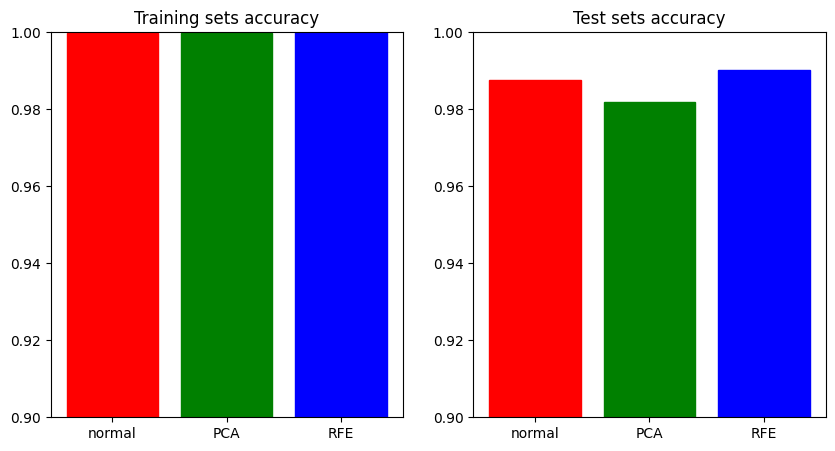

In [229]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
barlist1 = plt.bar(train_sets.keys(), train_score_DST)
barlist1[0].set_color('r')
barlist1[1].set_color('g')
barlist1[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Training sets accuracy')

fig.add_subplot(1, 2, 2)
barlist2 = plt.bar(test_sets.keys(), test_score_DST)
barlist2[0].set_color('r')
barlist2[1].set_color('g')
barlist2[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Test sets accuracy')

In [196]:
#random forest

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
params = {
            'criterion' : ['gini', 'entropy'],
            'n_estimators' : [10, 50, 100]
         }

In [199]:
model_GS_RFC = GridSearchCV(
    RandomForestClassifier(),
    params,
    scoring = 'accuracy',
    cv = 5,
    verbose = 4
)

In [200]:
best_models_RFC = {}
mean_train_time_RFC = {}
for train_set in train_sets:
    print(train_set)
    
    start_time = time.time()
    model_GS_RFC.fit(train_sets[train_set], y_train)
    end_time = time.time()
    
    best_models_RFC[train_set] = model_GS_RFC.best_estimator_
    mean_train_time_RFC[train_set] = end_time - start_time
    print(mean_train_time_RFC[train_set])

normal
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=0.997 total time=   1.6s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=0.996 total time=   1.6s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=0.997 total time=   1.7s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=0.996 total time=   1.5s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=0.997 total time=   1.6s
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=0.997 total time=   7.7s
[CV 2/5] END ...criterion=gini, n_estimators=50;, score=0.998 total time=   7.6s
[CV 3/5] END ...criterion=gini, n_estimators=50;, score=0.999 total time=   7.3s
[CV 4/5] END ...criterion=gini, n_estimators=50;, score=0.998 total time=   8.2s
[CV 5/5] END ...criterion=gini, n_estimators=50;, score=0.999 total time=  10.0s
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.998 total time=  21.6s
[CV 2/5] END ..criterion=gini, n_estimator

In [209]:
train_score_RFC = []
test_score_RFC = []
for best_model in best_models_RFC:
    print(best_model, end = ": ")
    
    train_score = best_models_RFC[best_model].score(train_sets[best_model], y_train)
    print(train_score, end = "; ")
    train_score_RFC.append(train_score)
    
    test_score = best_models_RFC[best_model].score(test_sets[best_model], y_test)
    print(test_score)
    test_score_RFC.append(test_score)

normal: 1.0; 0.9986327123568621
PCA: 1.0; 0.9951575229305532
RFE: 1.0; 0.9951575229305532


Text(0.5, 1.0, 'Test sets accuracy')

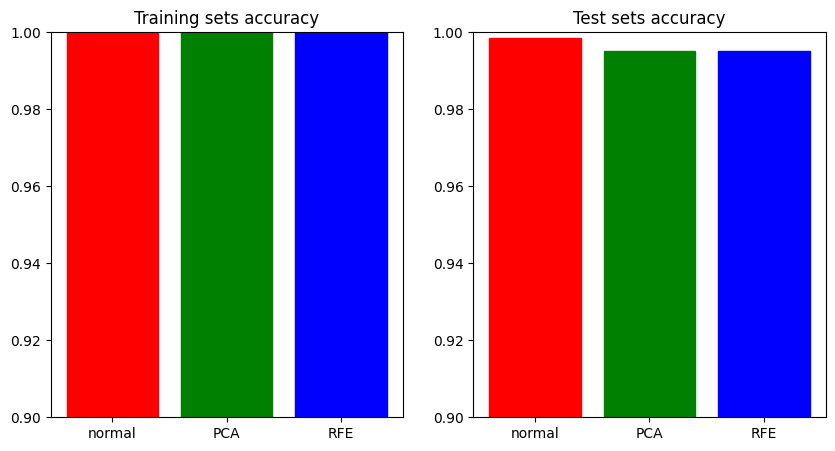

In [230]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
barlist1 = plt.bar(train_sets.keys(), train_score_RFC)
barlist1[0].set_color('r')
barlist1[1].set_color('g')
barlist1[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Training sets accuracy')

fig.add_subplot(1, 2, 2)
barlist2 = plt.bar(test_sets.keys(), test_score_RFC)
barlist2[0].set_color('r')
barlist2[1].set_color('g')
barlist2[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Test sets accuracy')

In [214]:
#KNN

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
params = {
            'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
         }

In [217]:
model_GS_KNN = GridSearchCV(
    KNeighborsClassifier(),
    params,
    scoring = 'accuracy',
    cv = 5,
    verbose = 4
)

In [218]:
best_models_KNN = {}
mean_train_time_KNN = {}
for train_set in train_sets_KNN:
    print(train_set)
    
    start_time = time.time()
    model_GS_KNN.fit(train_sets_KNN[train_set], y_train)
    end_time = time.time()
    
    best_models_KNN[train_set] = model_GS_KNN.best_estimator_
    mean_train_time_KNN[train_set] = end_time - start_time
    print(mean_train_time_KNN[train_set])

normal
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.984 total time=   1.6s
[CV 2/5] END .....................n_neighbors=1;, score=0.984 total time=   1.5s
[CV 3/5] END .....................n_neighbors=1;, score=0.984 total time=   1.5s
[CV 4/5] END .....................n_neighbors=1;, score=0.981 total time=   1.8s
[CV 5/5] END .....................n_neighbors=1;, score=0.981 total time=   1.5s
[CV 1/5] END .....................n_neighbors=2;, score=0.980 total time=   1.7s
[CV 2/5] END .....................n_neighbors=2;, score=0.980 total time=   1.9s
[CV 3/5] END .....................n_neighbors=2;, score=0.982 total time=   1.6s
[CV 4/5] END .....................n_neighbors=2;, score=0.976 total time=   1.7s
[CV 5/5] END .....................n_neighbors=2;, score=0.978 total time=   1.9s
[CV 1/5] END .....................n_neighbors=3;, score=0.983 total time=   2.1s
[CV 2/5] END .....................n_neigh

[CV 1/5] END .....................n_neighbors=1;, score=0.998 total time=   0.5s
[CV 2/5] END .....................n_neighbors=1;, score=0.998 total time=   0.5s
[CV 3/5] END .....................n_neighbors=1;, score=0.997 total time=   0.6s
[CV 4/5] END .....................n_neighbors=1;, score=0.998 total time=   0.5s
[CV 5/5] END .....................n_neighbors=1;, score=0.998 total time=   0.5s
[CV 1/5] END .....................n_neighbors=2;, score=0.998 total time=   0.6s
[CV 2/5] END .....................n_neighbors=2;, score=0.998 total time=   0.6s
[CV 3/5] END .....................n_neighbors=2;, score=0.997 total time=   0.6s
[CV 4/5] END .....................n_neighbors=2;, score=0.998 total time=   0.5s
[CV 5/5] END .....................n_neighbors=2;, score=0.998 total time=   0.5s
[CV 1/5] END .....................n_neighbors=3;, score=0.997 total time=   0.5s
[CV 2/5] END .....................n_neighbors=3;, score=0.998 total time=   0.6s
[CV 3/5] END ...............

In [222]:
train_score_KNN = []
test_score_KNN = []
for best_model in best_models_KNN:
    print(best_model, end = ": ")
    
    train_score = best_models_KNN[best_model].score(train_sets_KNN[best_model], y_train)
    print(train_score, end = "; ")
    train_score_KNN.append(train_score)
    
    test_score = best_models_KNN[best_model].score(test_sets_KNN[best_model], y_test)
    print(test_score)
    test_score_KNN.append(test_score)

normal: 0.9921867369860338; 0.9885489659887199
PCA: 0.9950434612755152; 0.9912265709565317
RFE: 1.0; 0.9973223950321882


Text(0.5, 1.0, 'Test sets accuracy')

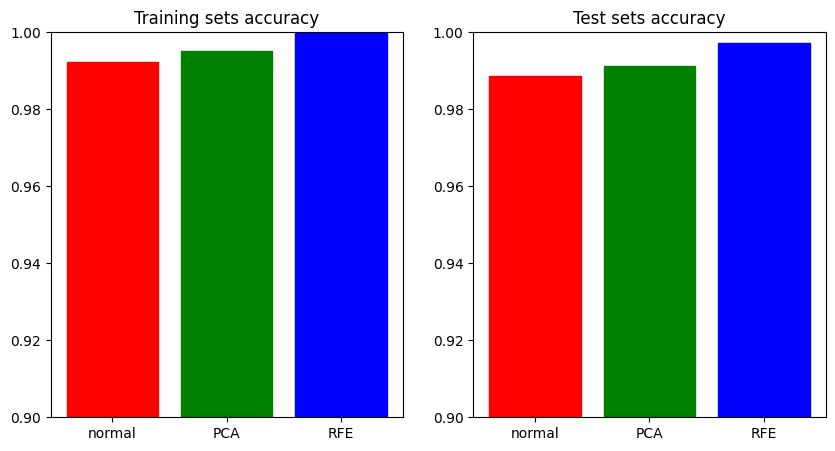

In [231]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
barlist1 = plt.bar(train_sets_KNN.keys(), train_score_KNN)
barlist1[0].set_color('r')
barlist1[1].set_color('g')
barlist1[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Training sets accuracy')

fig.add_subplot(1, 2, 2)
barlist2 = plt.bar(test_sets_KNN.keys(), test_score_KNN)
barlist2[0].set_color('r')
barlist2[1].set_color('g')
barlist2[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Test sets accuracy')

In [232]:
#zakljucci

In [233]:
#poredjenje razlicitih modela na RFE skupovima

In [267]:
best_models = [best_models_DST['RFE'], best_models_RFC['RFE'], best_models_KNN['RFE']]

In [268]:
best_test_sets = [test_sets['RFE'], test_sets['RFE'], test_sets_KNN['RFE']]

In [286]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [290]:
best_test_scores = []
for i in range(3):
    y_test_predict = best_models[i].predict(best_test_sets[i])
    
    print(accuracy_score(y_test_predict, y_test))
    print(precision_score(y_test_predict, y_test, average='weighted'))
    print(recall_score(y_test_predict, y_test, average='weighted'))
    print(f1_score(y_test_predict, y_test, average='weighted'))
    print(confusion_matrix(y_test_predict, y_test))
    
    test_score = accuracy_score(y_test_predict, y_test)
    best_test_scores.append(test_score)

0.9901441349057141
0.9901480616999797
0.9901441349057141
0.9901455160634318
[[1580    0    0    0    0   12    0    0    9    0    0]
 [   0 1570    1    0    0    0    0    0    4   21    0]
 [   0    0 1584    1   11    0    0    0    0    0    0]
 [   0    0    1 1593    3    0    0    0    0    0    0]
 [   0    1    6    2 1571    0    0   11    1    1    0]
 [  14    0    0    0    0 1567    0    0   13    0    0]
 [   0    0    0    0    0    0 1596    0    0    0    0]
 [   0    0    1    0   10    0    0 1583    1    0    0]
 [   2    7    2    0    0   17    0    2 1566    0    0]
 [   0   15    0    0    0    0    0    0    2 1574    0]
 [   0    2    0    0    0    0    0    0    0    0 1596]]
0.9951575229305532
0.995166058675996
0.9951575229305532
0.9951593750736506
[[1590    0    0    0    0    5    0    0    4    0    0]
 [   0 1580    0    0    0    0    0    0    2   13    0]
 [   0    0 1593    0    6    0    0    0    0    0    0]
 [   0    0    0 1596    1    0    0

In [293]:
best_test_sets[0]

,7,8,9,10,15,21,24
29940,0.008167,0.008389,-0.033093,-0.033089,0.002309,1.42030,-0.020883
16596,0.015230,0.015224,0.039853,0.039850,0.000821,1.77390,-0.005022
28015,0.016043,0.016257,-0.026672,-0.026700,0.001157,1.18660,0.004623
15264,0.000295,0.000057,0.015429,0.015463,0.002750,2.10320,0.009821
764,0.026757,0.026742,-0.031576,-0.031572,0.000796,1.75690,0.007468
...,...,...,...,...,...,...,...
49466,-0.029074,-0.029049,-0.012458,-0.012482,0.001230,1.57690,0.009742
26873,0.017091,0.017104,-0.024824,-0.024821,0.000768,0.96671,0.000336
411,0.023580,0.023580,-0.048029,-0.048031,0.000785,1.30810,0.018489
31646,0.010282,0.010203,-0.020155,-0.020198,0.002879,2.24420,-0.002194


Text(0.5, 1.0, 'Best(RFE) test sets accuracy')

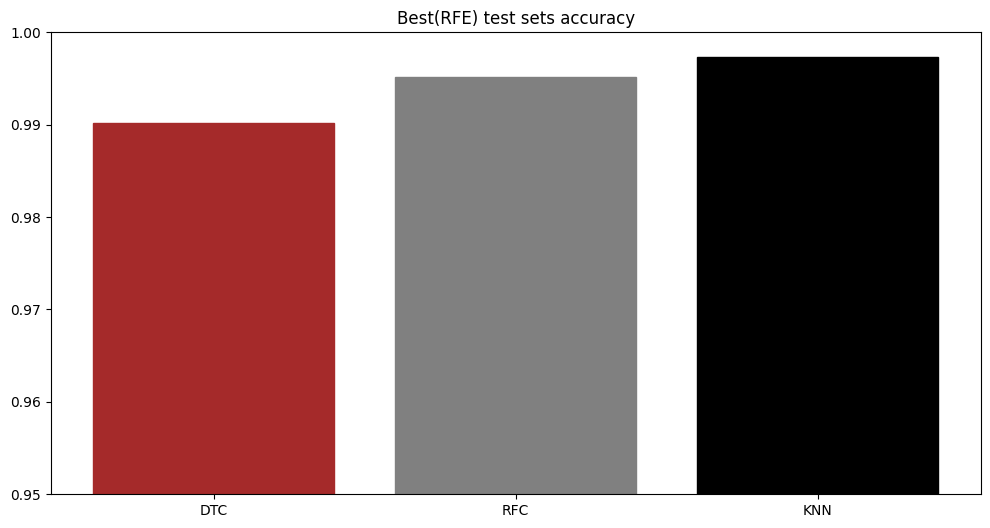

In [308]:
fig = plt.figure(figsize=(12, 6))

fig.add_subplot(1, 1, 1)
barlist1 = plt.bar(['DTC', 'RFC', 'KNN'], best_test_scores)
barlist1[0].set_color('brown')
barlist1[1].set_color('gray')
barlist1[2].set_color('black')
plt.rcParams["figure.figsize"] = (12,6)
plt.ylim([0.95, 1])
plt.title('Best(RFE) test sets accuracy')